In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
from tqdm import tqdm
from scipy.constants import g

## 1

### a

In [2]:
A = np.array([[1.,-2.,4.],[8.,-3.,2.],[-1.,10.,2.0]])
b = np.array([[6.],[2.],[4.]])

In [3]:
def GaussElimination_Pivoting(A,b,pivot = True):

    if A.shape[0]!=A.shape[1]:
        raise ValueError('Error The matrix is not a square matrix')
    elif A.shape[0]!=b.shape[0]:
        raise ValueError('Error A and b are not compatible')
    #Forming upper diagonal matrix
    rowchanges = 0
    for k in range(0,A.shape[0]-1):
        if pivot:
            idx = np.argmax(np.abs(A[k:, k])) + k
            if idx != k:
                print(f"swappin rows {k+1} and {idx+1}")
                rowchanges+=1
                A[[k, idx]] = A[[idx, k]]
                b[[k, idx]] = b[[idx, k]]
        for i in range(k+1,A.shape[0]):
            if A[k,k] == 0:
                raise ZeroDivisionError('Division by zero')
            m = A[i,k]/A[k,k]
            A[i,:] = A[i,:] - m*A[k,:]
            b[i] = b[i] - m*b[k]
    x = np.zeros_like(b)

    #Backward substitution
    for i in (range(b.shape[0]-1,-1,-1)):
        x[i] = (b[i] - np.dot(A[i,i+1:A.shape[0]],x[i+1:b.shape[0]]))/A[i,i]
    return x,rowchanges

In [4]:
x,rowchanges = GaussElimination_Pivoting(A.copy(),b.copy())
print(f"Number of row interchanges: {rowchanges} and the solution is \n{x}")

swappin rows 1 and 2
swappin rows 2 and 3
Number of row interchanges: 2 and the solution is 
[[-0.11320755]
 [ 0.0754717 ]
 [ 1.56603774]]


In [5]:
A@x

array([[6.],
       [2.],
       [4.]])

### b

In [6]:
def GaussElimination_Pivoting_3dec(A,b,pivot = True):

    if A.shape[0]!=A.shape[1]:
        raise ValueError('Error The matrix is not a square matrix')
    elif A.shape[0]!=b.shape[0]:
        raise ValueError('Error A and b are not compatible')
    #Forming upper diagonal matrix
    rowchanges = 0
    for k in range(0,A.shape[0]-1):
        if pivot:
            idx = np.argmax(np.abs(A[k:, k])) + k
            if idx != k:
                print(f"swappin rows {k+1} and {idx+1}")
                rowchanges+=1
                A[[k, idx]] = A[[idx, k]]
                b[[k, idx]] = b[[idx, k]]
        for i in range(k+1,A.shape[0]):
            if A[k,k] == 0:
                raise ZeroDivisionError('Division by zero')
            m = np.round(A[i,k]/A[k,k],3)
            A[i,:] = np.round(A[i,:] - m*A[k,:],3)
            b[i] = np.round(b[i] - m*b[k],3)
    x = np.zeros_like(b)

    #Backward substitution
    for i in (range(b.shape[0]-1,-1,-1)):
        x[i] = np.round((np.round(b[i] - np.round(np.dot(A[i,i+1:A.shape[0]],x[i+1:b.shape[0]])),3))/np.round(A[i,i]),3)
    return x,rowchanges

In [7]:
x2,rowchanges2 = GaussElimination_Pivoting_3dec(A.copy(),b.copy())
x2

swappin rows 1 and 2
swappin rows 2 and 3


array([[-0.125],
       [ 0.025],
       [ 1.617]])

In [8]:
A@x2

array([[6.293],
       [2.159],
       [3.609]])

### c 

In [9]:
x3,rowchanges3 = GaussElimination_Pivoting_3dec(A.copy(),b.copy(),False)
x3

array([[0.   ],
       [0.154],
       [1.595]])

In [10]:
A@x3

array([[6.072],
       [2.728],
       [4.73 ]])

As we can see that the results from section b and c are not the same 

## 2

In [11]:
N  = 27
f = lambda x: x**3 - N


### a

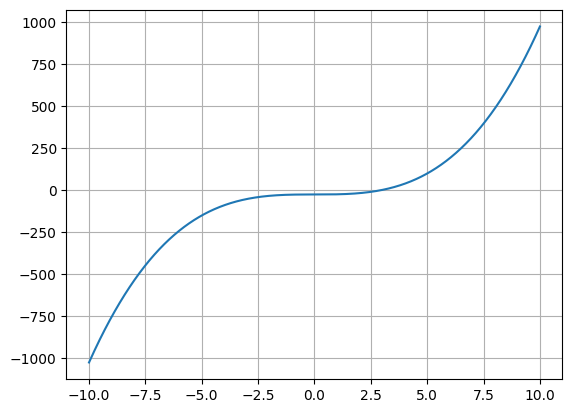

In [12]:
x = np.linspace(-10,10,1001)
y = f(x)
plt.plot(x,y)
plt.grid()
plt.show()

### b

In [13]:
maxiter = 100
tol = 1e-7

x0 = 1.0
for _ in tqdm(range(maxiter)):
    x1 = (4*x0**3 + 2*N)/(6*x0**2)
    err = np.abs(x1-x0)/np.abs(x0)
    if err<tol:
        break
    x0 = x1

x1

  8%|▊         | 8/100 [00:00<?, ?it/s]


3.0000000000000004

## 3

In [14]:
def Determinant(A):
    n  = A.shape[0]
    m = A.shape[1]
    if m!=n:
        raise ValueError("Matrix is not a square matrix")
    elif n == 2:
        return A[0,0]*A[1,1] - A[1,0]*A[0,1]
    elif n== 1:
        return A[0,0]
    else:
        sum = 0
        submatrix = np.zeros(shape=(n-1,n-1))
        for i in range(n):
            k=0
            for j in range(m):
                if i!=j:
                    submatrix[:,k] = A[1:,j]
                    k+=1
            sum+=A[0,i]*np.pow(-1,i)*Determinant(submatrix)
        return sum
    
def AdjointMatrix(A):
    n  = A.shape[0]
    m = A.shape[1]
    if m!=n:
        raise ValueError("Matrix is not a square matrix")
    else:
        C = np.zeros_like(A)
        for i in range(n):
            for j in range(n):
                submatrix = np.zeros(shape=(n-1,n-1))
                row = 0
                for k in range(n):
                    col = 0
                    if k==i:
                        continue
                    for l in range(n):
                        if l==j:
                            continue
                        submatrix[row,col] = A[k,l]
                        col+=1
                    row+=1
                C[i,j] = Determinant(submatrix)*np.pow(-1,i+j)
        adj = np.transpose(C)
    return adj

def inversematrix(A):
    adj = AdjointMatrix(A)
    det = Determinant(A)
    if det==0:
        raise Exception("Matrix is singular")
    inv = adj/det
    return inv


In [15]:
A = np.array([[2.75,-1.72,4.64],[1.75,-2.92,-1],[4.5,-4.64,3.69]])
inv = inversematrix(A)
inv

array([[ 61.41354582,  60.48924303, -60.83187251],
       [ 43.65537849,  42.75896414, -43.30677291],
       [-20.        , -20.        ,  20.        ]])

In [16]:
print(A@inv)

[[ 1.00000000e+00  4.12114787e-15 -1.83320026e-14]
 [ 1.77635684e-14  1.00000000e+00  7.10542736e-15]
 [-1.16173737e-14 -1.38200562e-14  1.00000000e+00]]


In [17]:
np.linalg.inv(A)

array([[ 61.41354582,  60.48924303, -60.83187251],
       [ 43.65537849,  42.75896414, -43.30677291],
       [-20.        , -20.        ,  20.        ]])

## 4

### A

In [18]:
def Condition_Number(A):
    if A.shape[0]!=A.shape[1]:
        raise Exception('A is not a square matrix')
    A_inv = inversematrix(A)
    norm_A = -100000
    n = A.shape[0]
    for i in range(0,n):
        sum = 0
        for j in range(0,n):
            sum+= np.abs(A[i,j])
        if sum>norm_A:
            norm_A = sum
    norm_Ainv = -100000
    n = A.shape[0]
    for i in range(0,n):
        sum = 0
        for j in range(0,n):
            sum+= np.abs(A_inv[i,j])
        if sum>norm_Ainv:
            norm_Ainv = sum
    return norm_A*norm_Ainv


In [19]:
A = np.array([[1.99,2.01],[2.01,1.99]])
Condition_Number(A)
print(f"The condition number from my func {Condition_Number(A)} and \nthrough numpy is {np.linalg.cond(A,p=np.inf)}")

The condition number from my func 200.00000000000313 and 
through numpy is 200.00000000000315


### B


#### 1

In [20]:
Ad= np.array([[3,2,4,9],[8,-6,-8,-6],[-1,2,3,4]])
n = Ad.shape[0]
A = Ad[:,:-1]
b = np.reshape(Ad[:,-1],shape=(n,1))
b

array([[ 9],
       [-6],
       [ 4]])

In [21]:
Condition_Number(A)

np.float64(935.0)

In [22]:
def GaussElimination_Pivoting_double(A,b,pivot = True):
    A = np.asarray(A, dtype=np.float64)
    b = np.asarray(b, dtype=np.float64)
    if A.shape[0]!=A.shape[1]:
        raise ValueError('Error The matrix is not a square matrix')
    elif A.shape[0]!=b.shape[0]:
        raise ValueError('Error A and b are not compatible')
    #Forming upper diagonal matrix
    for k in range(0,A.shape[0]-1):
        if pivot:
            idx = np.argmax(np.abs(A[k:, k])) + k
            if idx != k:
                A[[k, idx]] = A[[idx, k]]
                b[[k, idx]] = b[[idx, k]]
        for i in range(k+1,A.shape[0]):
            if A[k,k] == 0:
                raise ZeroDivisionError('Division by zero')
            m = A[i,k]/A[k,k]
            A[i,:] = A[i,:] - m*A[k,:]
            b[i] = b[i] - m*b[k]
    x = np.zeros_like(b,dtype=np.float64)

    #Backward substitution
    for i in (range(b.shape[0]-1,-1,-1)):
        x[i] = (b[i] - np.dot(A[i,i+1:A.shape[0]],x[i+1:b.shape[0]]))/A[i,i]
    return x

In [23]:
x = GaussElimination_Pivoting_double(A.copy(),b.copy())
x

array([[1.],
       [1.],
       [1.]])

#### 2

In [24]:
def GaussElimination_Pivoting_3dec_float(A,b,pivot = True):
    A = np.asarray(A, dtype=np.float64)
    b = np.asarray(b, dtype=np.float64)
    if A.shape[0]!=A.shape[1]:
        raise ValueError('Error The matrix is not a square matrix')
    elif A.shape[0]!=b.shape[0]:
        raise ValueError('Error A and b are not compatible')
    #Forming upper diagonal matrix
    for k in range(0,A.shape[0]-1):
        if pivot:
            idx = np.argmax(np.abs(A[k:, k])) + k
            if idx != k:
                A[[k, idx]] = A[[idx, k]]
                b[[k, idx]] = b[[idx, k]]
        for i in range(k+1,A.shape[0]):
            if A[k,k] == 0:
                raise ZeroDivisionError('Division by zero')
            m = np.round(A[i,k]/A[k,k],3)
            A[i,:] = np.round(A[i,:] - m*A[k,:],3)
            b[i] = np.round(b[i] - m*b[k],3)
    x = np.zeros_like(b,dtype=np.float64)
    #Backward substitution
    for i in (range(b.shape[0]-1,-1,-1)):
        x[i] = np.round((np.round(b[i] - np.round(np.dot(A[i,i+1:A.shape[0]],x[i+1:b.shape[0]])),3))/np.round(A[i,i],3))
    return x

In [25]:
x1 = GaussElimination_Pivoting_3dec_float(A.copy(),b.copy())
x1

array([[1.],
       [1.],
       [1.]])

We see that the solution is same

## 5

In [26]:
def Analytical_sol(t):
    return -1.5*np.exp(-t)+3*np.exp(-3*t)
def Euler_Sol(u0,t,dt):
    u=np.zeros_like(t)
    u[0] = u0
    for i in range(1,t.size):
        u[i] = u[i-1] - (3*np.exp(-t[i-1]) + 3*u[i-1])*dt
    return u
def Modified_Euler(u0,t,dt):
    u = np.zeros_like(t)
    u[0] = u0
    for i in range(1,t.size):
        u[i] = u[i-1] - (3*np.exp(-t[i]) + 3*u[i-1])*dt
    return u
def Runge_Kutta(u0,f,t,dt):
    k=np.zeros(4)
    u = np.zeros_like(t)
    u[0] = u0
    for i in range(1,t.size):
        k[0] = f(u[i-1],t[i-1])
        k[1] = f(u[i-1]+(dt*k[0]/2),t[i-1]+dt/2)
        k[2] = f(u[i-1]+dt*k[1]/2,t[i-1]+dt/2)
        k[3] = f(u[i-1]+dt*k[2],t[i-1]+dt)
        u[i] = u[i-1] + (dt/6)*(k[0] + k[1] + k[2] + k[3])
    return u

In [27]:
dt = np.linspace(0.5,0.01,5)
u0 = 1.5
f = lambda u,t: -3*u - 3*np.exp(-t)

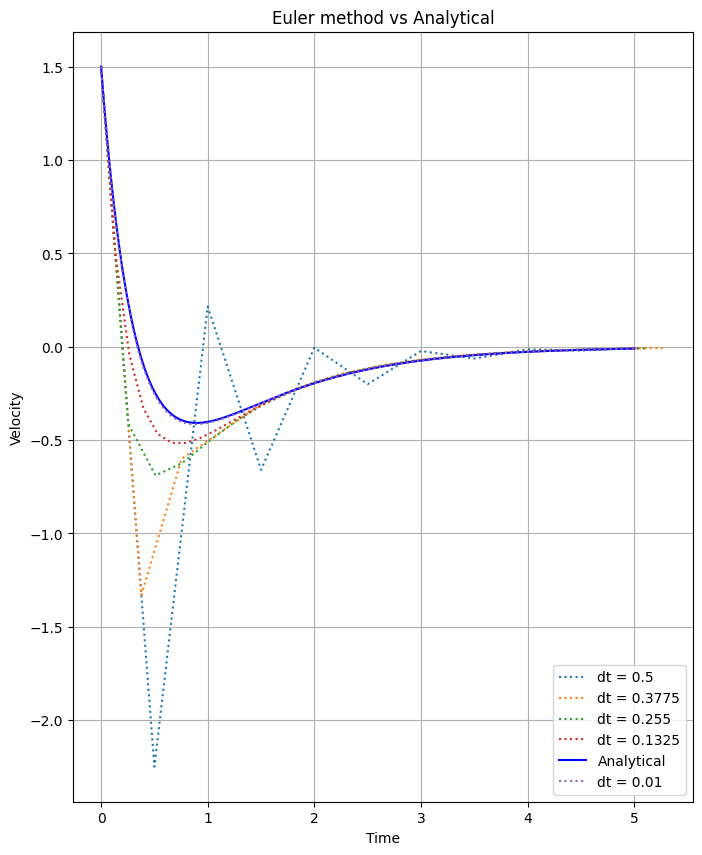

In [28]:
plt.figure(figsize=(8,10))
for i in dt:
    t = np.arange(0,5+i,i)
    u_analytical=Analytical_sol(t)
    u_euler = Euler_Sol(u0,t,i)
    if dt[-1] ==i:
        plt.plot(t,u_analytical,ls = "-",label =f'Analytical',color ='b')
    plt.plot(t,u_euler,ls = ":",label=f'dt = {i}')
plt.legend().set_loc('lower right')
plt.grid()
plt.title('Euler method vs Analytical')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.show()

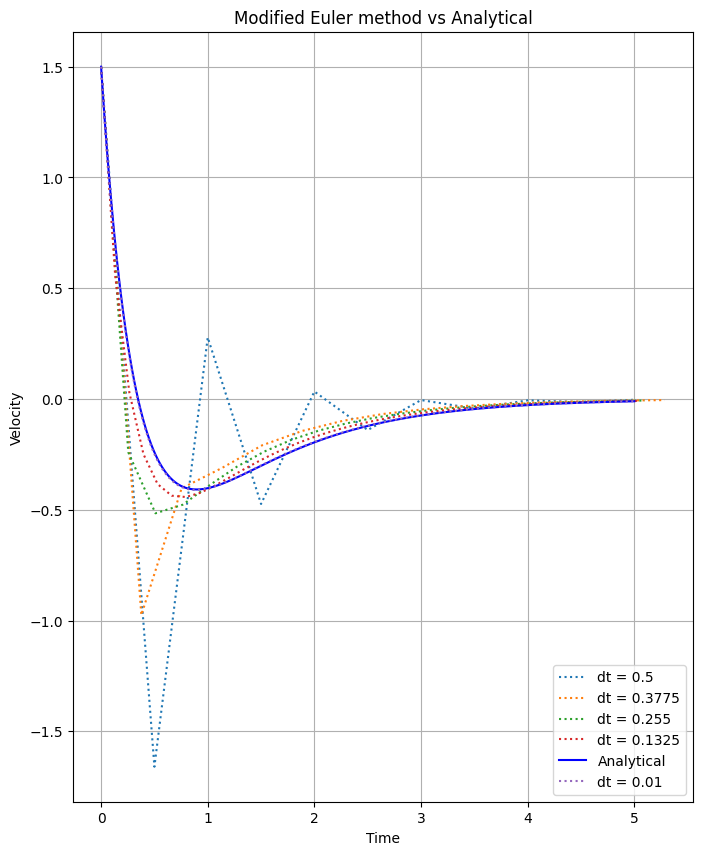

In [29]:
plt.figure(figsize=(8,10))
for i in dt:
    t = np.arange(0,5+i,i)
    u_analytical=Analytical_sol(t)
    u_me = Modified_Euler(u0,t,i)
    if dt[-1] ==i:
        plt.plot(t,u_analytical,ls = "-",label =f'Analytical',color ='b')
    plt.plot(t,u_me,ls = ":",label=f'dt = {i}')
plt.legend().set_loc('lower right')
plt.grid()
plt.title('Modified Euler method vs Analytical')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.show()

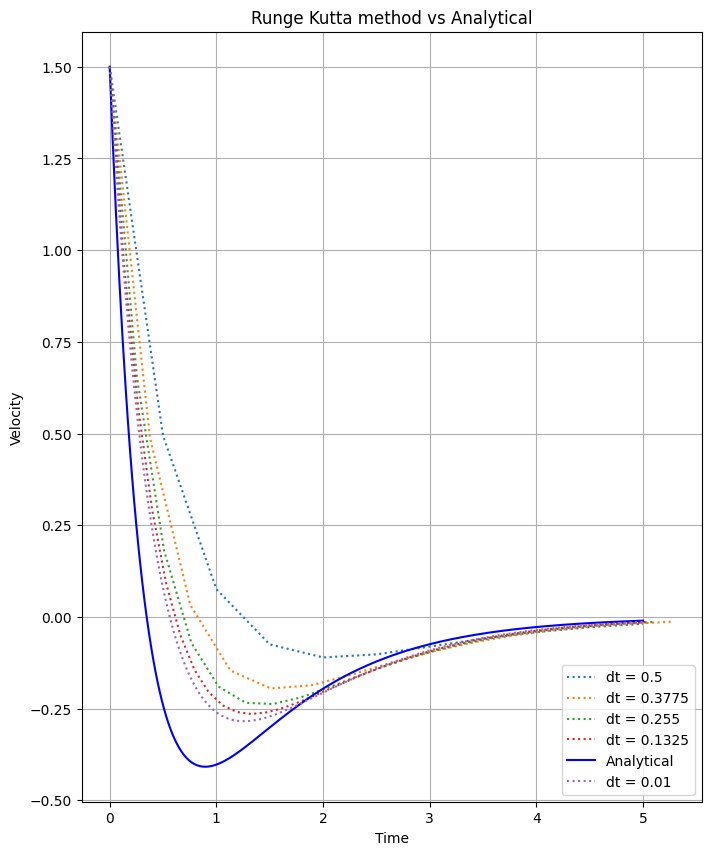

In [30]:
plt.figure(figsize=(8,10))
for i in dt:
    t = np.arange(0,5+i,i)
    u_analytical=Analytical_sol(t)
    u_rk = Runge_Kutta(u0,f,t,i)   
    if dt[-1] ==i:
        plt.plot(t,u_analytical,ls = "-",label =f'Analytical',color ='b')
    plt.plot(t,u_rk,ls = ":",label=f'dt = {i}')
plt.legend().set_loc('lower right')
plt.grid()
plt.title('Runge Kutta method vs Analytical')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.show()

### b

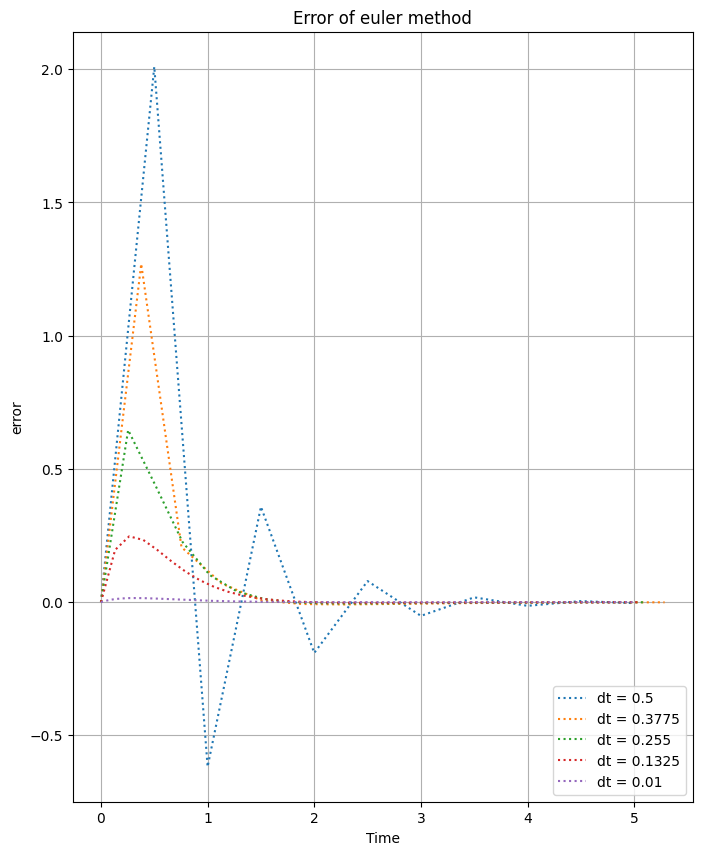

In [31]:
plt.figure(figsize=(8,10))
for i in dt:
    t = np.arange(0,5+i,i)
    u_analytical=Analytical_sol(t)
    u_euler = Euler_Sol(u0,t,i)
    u_err = u_analytical - u_euler
    plt.plot(t,u_err,ls = ":",label=f'dt = {i}')
plt.legend().set_loc('lower right')
plt.grid()
plt.title('Error of euler method')
plt.xlabel('Time')
plt.ylabel('error')
plt.show()

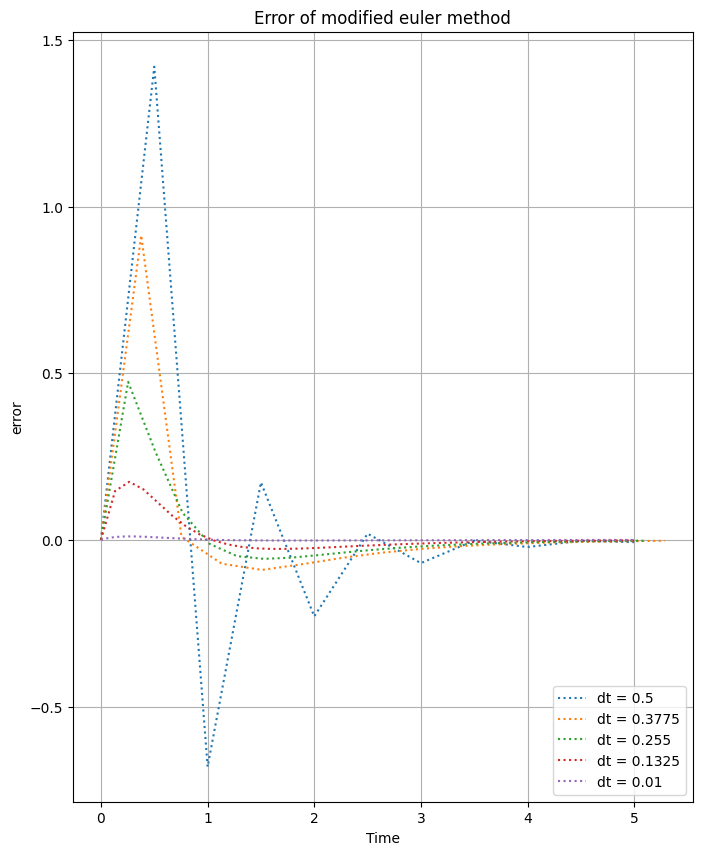

In [32]:
plt.figure(figsize=(8,10))
for i in dt:
    t = np.arange(0,5+i,i)
    u_analytical=Analytical_sol(t)
    u_me = Modified_Euler(u0,t,i)
    u_err = u_analytical - u_me
    plt.plot(t,u_err,ls = ":",label=f'dt = {i}')
plt.legend().set_loc('lower right')
plt.grid()
plt.title('Error of modified euler method')
plt.xlabel('Time')
plt.ylabel('error')
plt.show()

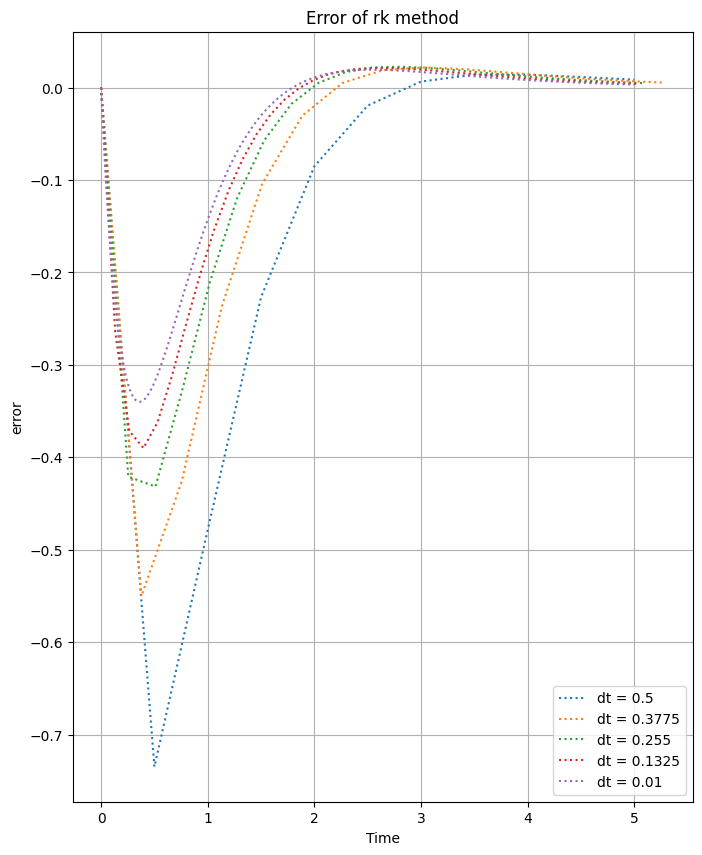

In [33]:
plt.figure(figsize=(8,10))
for i in dt:
    t = np.arange(0,5+i,i)
    u_analytical=Analytical_sol(t)
    u_rk = Runge_Kutta(u0,f,t,i)
    u_err = u_analytical - u_rk
    plt.plot(t,u_err,ls = ":",label=f'dt = {i}')
plt.legend().set_loc('lower right')
plt.grid()
plt.title('Error of rk method')
plt.xlabel('Time')
plt.ylabel('error')
plt.show()

### c

Modified Euler shows the lowest error

## 6

In [34]:
class SimpleHarmonicOscillator:
    def __init__(self,x0,v0,n,dt,k,m):
        self.x0 = x0
        self.v0 = v0
        self.n = n
        self.dt =dt
        self.k = k
        self.m = m
        self.t = np.arange(0,n*dt,dt)
        
    def Analytical_sol(self):
        w = np.sqrt(self.k/self.m)
        A = self.v0/w
        B = self.x0
        x = A*np.sin(w*self.t)+B*np.cos(w*self.t)
        v = A*w*np.cos(w*self.t) - B*w*np.sin(w*self.t)
        return x,v
    def EulerMethod(self):
        x = np.zeros(self.n,dtype=float)
        v = np.zeros(self.n,dtype=float)
        x[0] = self.x0
        v[0] = self.v0
        for i in range(1,self.n):
            x[i] = x[i-1] + v[i-1]*self.dt
            v[i] = v[i-1] + (-self.k/self.m)*x[i-1]*self.dt
        return x,v
    def Backward_euler(self):
        x = np.zeros(self.n,dtype=float)
        v = np.zeros(self.n,dtype=float)
        x[0] = self.x0
        v[0] = self.v0
        for i in range(1,self.n):
            x[i] = (x[i-1]+v[i-1]*self.dt)/(1+(self.k/self.m)*self.dt**2)
            v[i] = v[i-1] + (-self.k/self.m)*x[i]*self.dt
        return x,v
    def ModifiedEuler(self):
        x = np.zeros(self.n,dtype=float)
        v = np.zeros(self.n,dtype=float)
        x[0] = self.x0
        v[0] = self.v0
        for i in range(1,self.n):
            v[i] = v[i-1] + (-self.k/self.m)*x[i-1]*self.dt
            x[i] = x[i-1] + v[i]*self.dt
        return x,v
    def Verlet(self):
        x = np.zeros(self.n+1,dtype=float)
        v = np.zeros(self.n,dtype=float)
        x[0] = self.x0
        x[1] = x[0]+v[0]*self.dt + (-self.k/self.m)*x[0]*self.dt**2
        v[0] = self.v0
        for i in range(2,self.n+1):
            x[i] = 2*x[i-1] + (-self.k/self.m)*x[i-1]*self.dt**2 - x[i-2]
            v[i-1] = (x[i] - x[i-2])/(2*self.dt)
        x = x[:-1]
        return x,v
    def errorEuler(self):
        error_M = np.array([[1,self.dt],[(-(self.k/self.m)*self.dt),1]])
        eig_value,eig_vector = np.linalg.eig(error_M)
        return eig_value
    def errorModifiedEuler(self):
        error_M = np.array([[(1-(self.k*self.dt**2)/self.m),self.dt],[-self.k*self.dt/self.m,1]])
        eig_value,eig_vector = np.linalg.eig(error_M)
        return eig_value
    def PotentialEnergy(self,x):
        return 0.5*self.k*x**2
    def KineticEnergy(self,v):
        return 0.5*self.m*v**2


In [35]:
x0 = 0
v0 = 1
m =1
k =1
n = 1000
dt = 0.01

sho = SimpleHarmonicOscillator(x0,v0,n,dt,k,m)

### a

In [36]:
x_fe,v_fe = sho.EulerMethod()
x_be,v_be = sho.Backward_euler()
x_ms,v_ms = sho.ModifiedEuler()
x_a,v_a = sho.Analytical_sol()

In [37]:
p_a = v_a*m
p_ms = v_ms*m
p_be = v_be*m
p_fe = v_fe*m

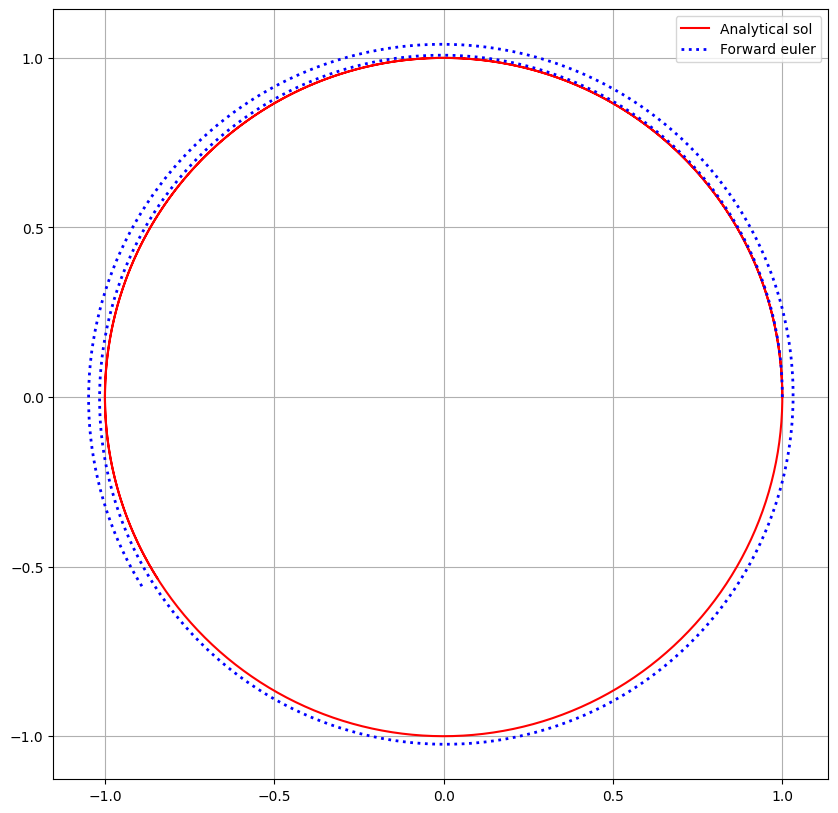

In [38]:
plt.figure(figsize=(10,10))
plt.plot(p_a,x_a,ls ='-',color = 'r' ,label = f'Analytical sol')
plt.plot(p_fe,x_fe,ls =':',color = 'b',lw = 2 ,label = f'Forward euler')
plt.grid()
plt.legend()
plt.show()

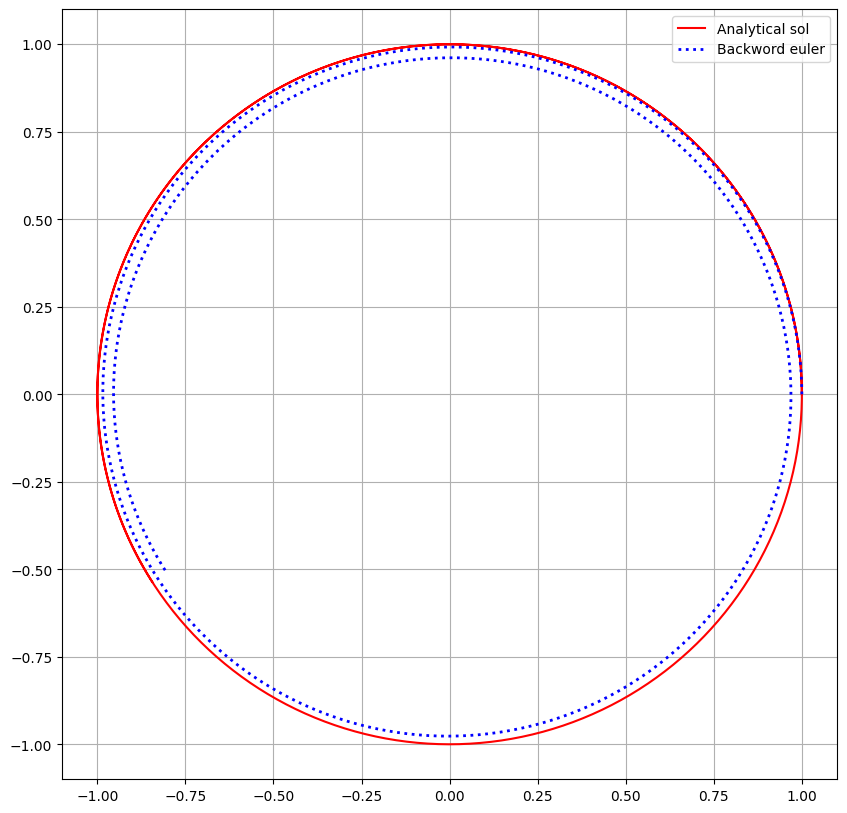

In [39]:
plt.figure(figsize=(10,10))
plt.plot(p_a,x_a,ls ='-',color = 'r',label =f'Analytical sol')
plt.plot(p_be,x_be,ls =':',color = 'b',lw = 2,label = f'Backword euler')
plt.grid()
plt.legend()
plt.show()

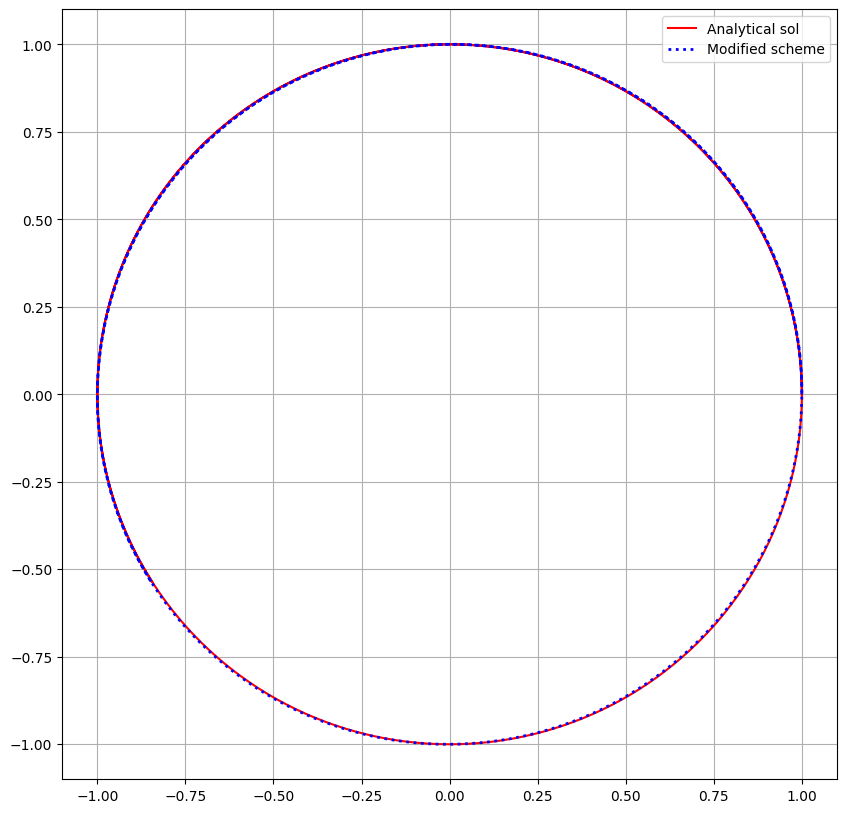

In [40]:
plt.figure(figsize=(10,10))
plt.plot(p_a,x_a,ls ='-',color = 'r',label =f'Analytical sol')
plt.plot(p_ms,x_ms,ls =':',color = 'b',lw = 2,label = f'Modified scheme')
plt.grid()
plt.legend()
plt.show()

### b

In [41]:
te_a =sho.PotentialEnergy(x_a) + sho.KineticEnergy(v_a)
te_fe =sho.PotentialEnergy(x_fe) + sho.KineticEnergy(v_fe)
te_be =sho.PotentialEnergy(x_be) + sho.KineticEnergy(v_be)
te_ms =sho.PotentialEnergy(x_ms) + sho.KineticEnergy(v_ms)

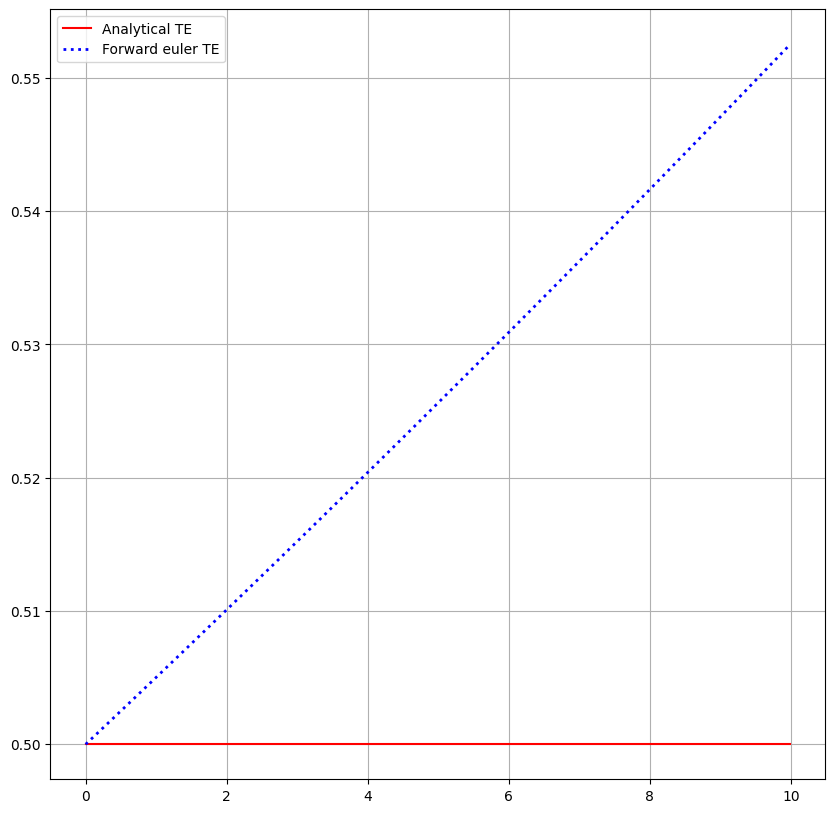

In [42]:
plt.figure(figsize=(10,10))
plt.plot(sho.t,te_a,ls ='-',color = 'r',label =f'Analytical TE')
plt.plot(sho.t,te_fe,ls =':',color = 'b',lw = 2,label = f'Forward euler TE')
plt.grid()
plt.legend()
plt.show()

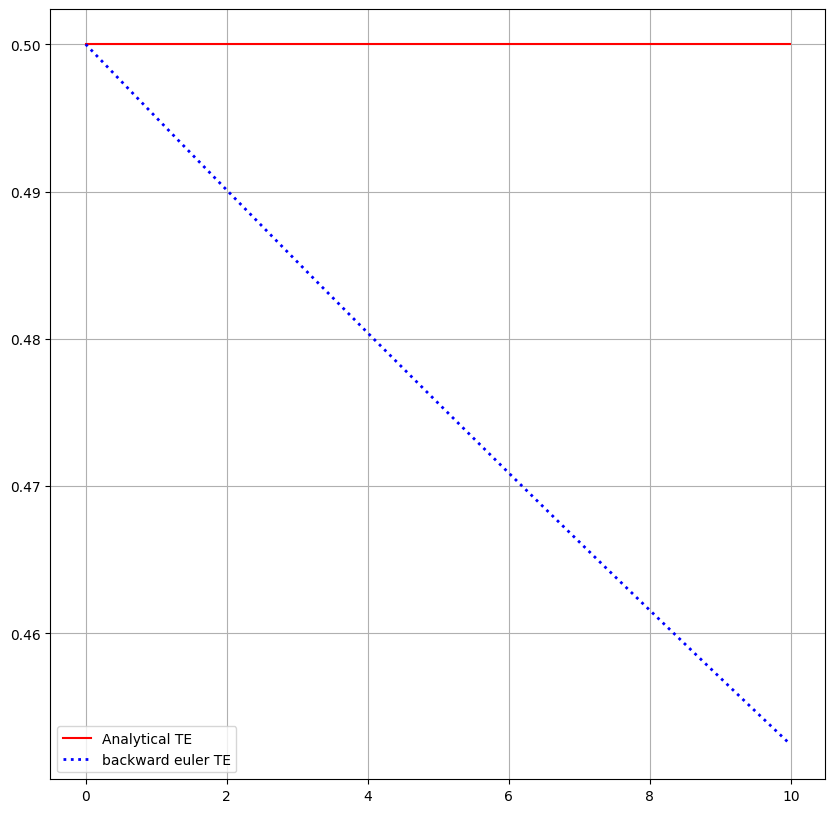

In [43]:
plt.figure(figsize=(10,10))
plt.plot(sho.t,te_a,ls ='-',color = 'r',label =f'Analytical TE')
plt.plot(sho.t,te_be,ls =':',color = 'b',lw = 2,label = f'backward euler TE')
plt.grid()
plt.legend()
plt.show()

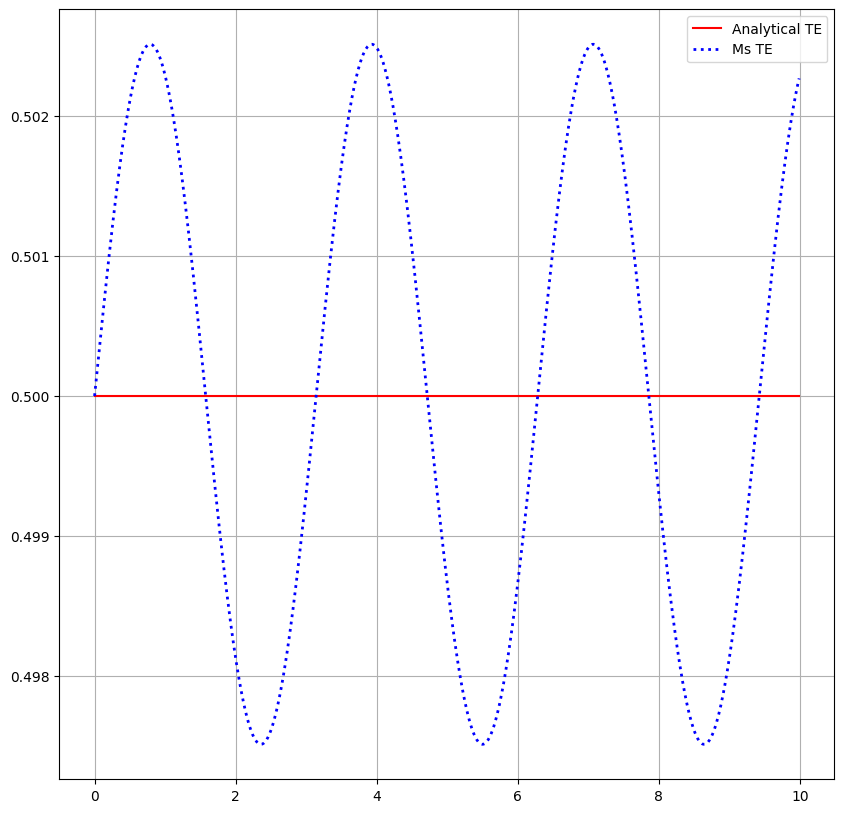

In [44]:
plt.figure(figsize=(10,10))
plt.plot(sho.t,te_a,ls ='-',color = 'r',label =f'Analytical TE')
plt.plot(sho.t,te_ms,ls =':',color = 'b',lw = 2,label = f'Ms TE')
plt.grid()
# plt.ylim(-0.5,1)
plt.legend()
plt.show()

### c

In [45]:
dt = np.linspace(3,0.00001,200001)

In [46]:
err_euler = np.zeros(dt.size)
err_ms = np.zeros(dt.size)
for i in range(dt.size):
    sho.dt = dt[i]
    error_euler = sho.errorEuler()
    err_euler[i] = np.abs(error_euler)[0]
    error_ms = sho.errorModifiedEuler()
    err_ms[i] = np.abs(error_ms)[0]

err_euler

array([3.16227766, 3.16226343, 3.1622492 , ..., 1.        , 1.        ,
       1.        ])

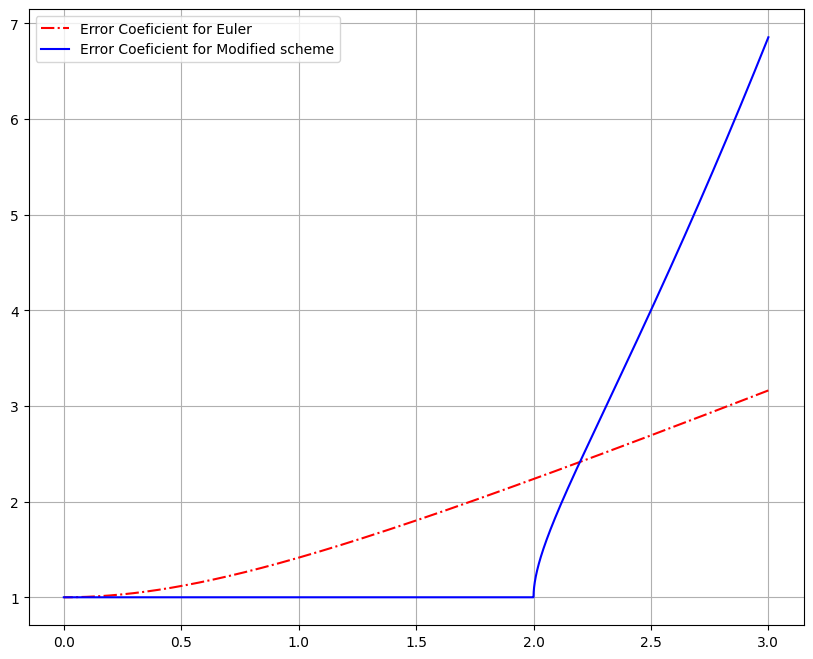

In [47]:
plt.figure(figsize=(10,8))
plt.plot(dt,err_euler,ls = '-.', color = 'r',label = f'Error Coeficient for Euler')
plt.plot(dt,err_ms,ls = '-', color = 'b',label = 'Error Coeficient for Modified scheme')
plt.legend()
plt.grid()
plt.show()


From the plot it is clear that the Euler scheme is never stable for any dt value whereas the Modified scheme is stable till dt = 2 which is quite a big dt.

## 7

### a

$$ \frac{d^2y}{dt^2} = -g -kv$$

### b

In [48]:
k = 0.1 #s-1
h0 = 20
v0 =5
n =1000
dt = 0.01
t = np.arange(0,n*dt+dt,dt)

In [49]:
def Verlet(k,h0,v0,n,dt):
    t = np.arange(0,n*dt+dt,dt)
    h = np.zeros(n+1)
    v = np.zeros_like(t)
    h[0] =h0
    v[0]= v0
    acc = -g - k*v[0]
    for i in range(1,n+1):
        velhalf = v[i-1] + 0.5*acc*dt
        h[i] = h[i-1] + velhalf*dt
        acc = -g - k*velhalf
        v[i] = velhalf + 0.5*acc*dt 
        if h[i]<=0:
            h[i] = 0
            v[i] = -v[i]
    return h,v

In [50]:
h,v = Verlet(k,h0,v0,n,dt)
v

array([ 5.        ,  4.89695927,  4.79399581, ..., 11.14269694,
       11.03348774, 10.92438775])

### c

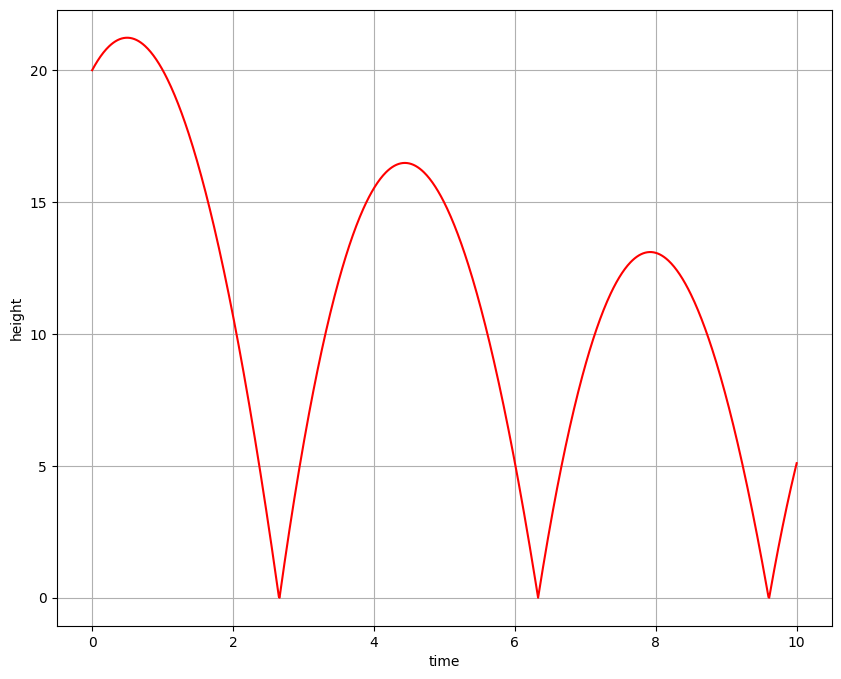

In [51]:
plt.figure(figsize=(10,8))
plt.plot(t,h,color = 'r')
plt.grid()
plt.xlabel('time')
plt.ylabel('height')
plt.show()

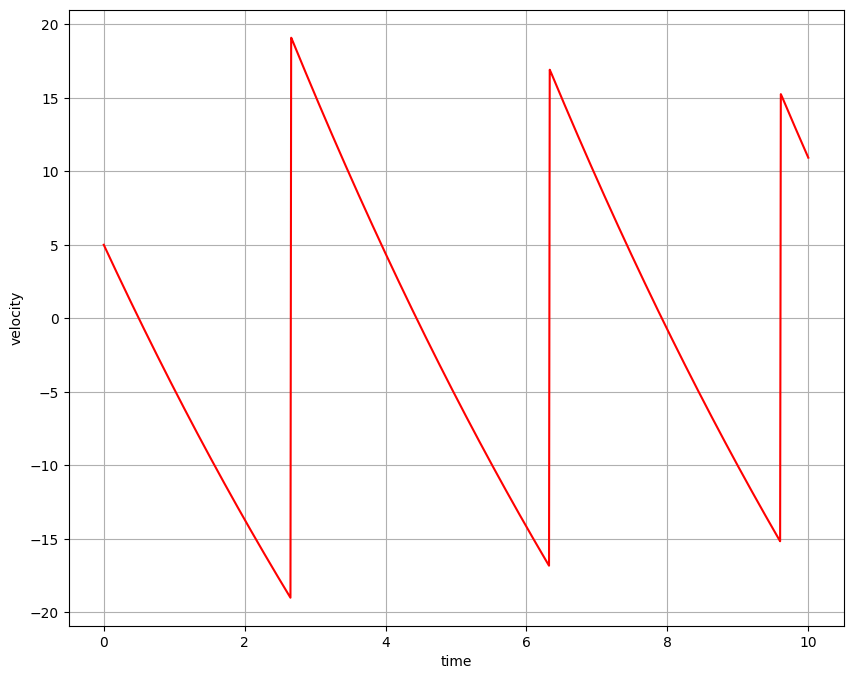

In [52]:
plt.figure(figsize=(10,8))
plt.plot(t,v,color = 'r')
plt.grid()
plt.xlabel('time')
plt.ylabel('velocity')
plt.show()

### d

In [53]:
m = 1
pe = m*g*h
ke = 0.5*m*v**2

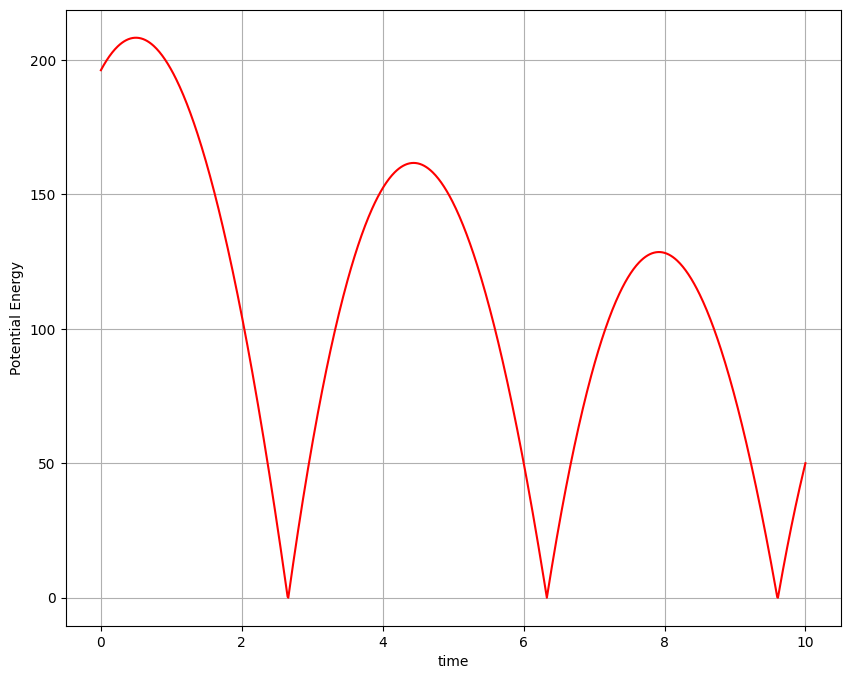

In [54]:
plt.figure(figsize=(10,8))
plt.plot(t,pe,color = 'r')
plt.grid()
plt.xlabel('time')
plt.ylabel('Potential Energy')
plt.show()

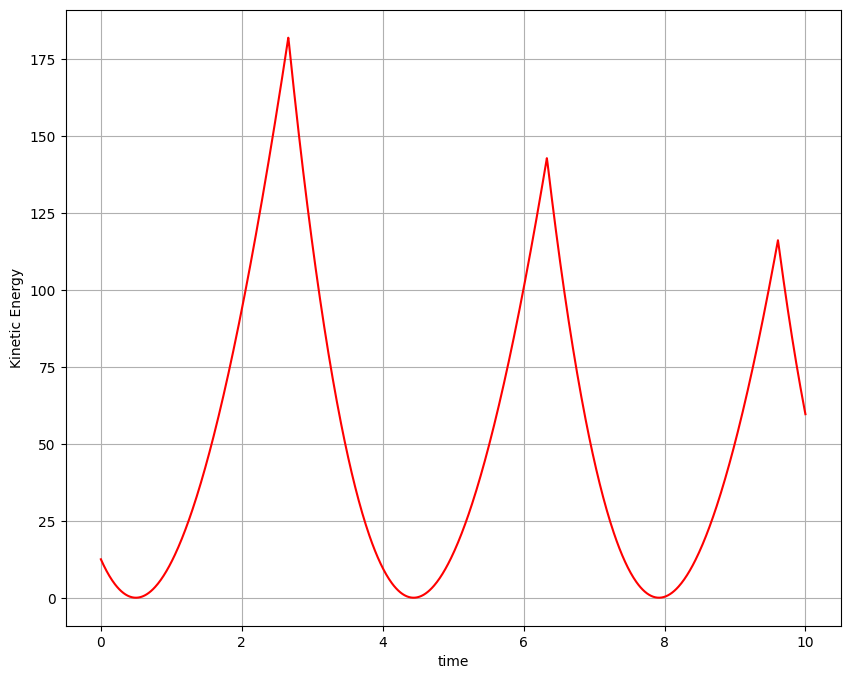

In [55]:
plt.figure(figsize=(10,8))
plt.plot(t,ke,color = 'r')
plt.grid()
plt.xlabel('time')
plt.ylabel('Kinetic Energy')
plt.show()

### e

In [56]:
k = 0
h2,v2 = Verlet(k,h0,v0,n,dt)
v2

array([  5.       ,   4.9019335,   4.803867 , ..., -10.69064  ,
       -10.7887065, -10.886773 ])

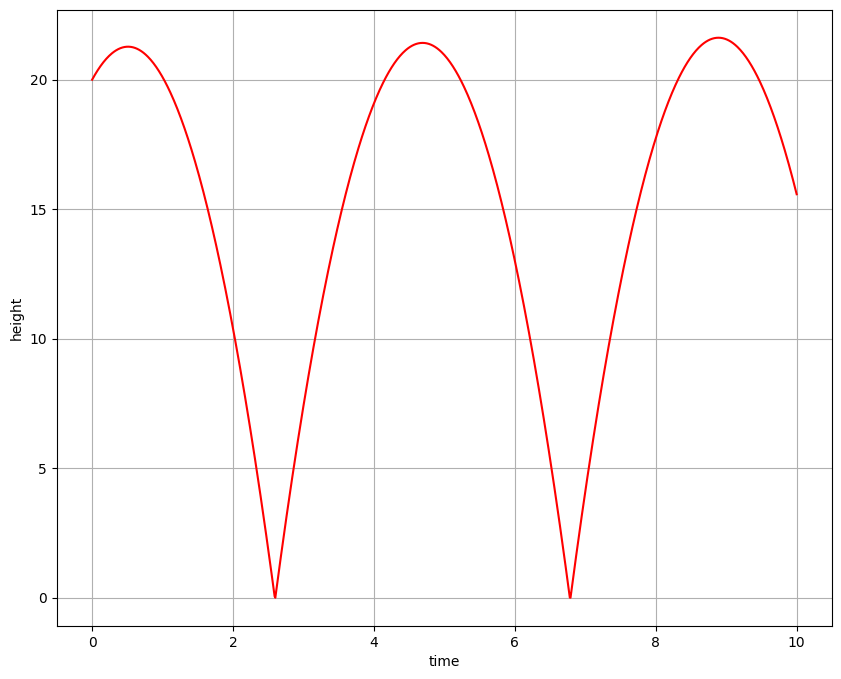

In [57]:
plt.figure(figsize=(10,8))
plt.plot(t,h2,color = 'r')
plt.grid()
plt.xlabel('time')
plt.ylabel('height')
plt.show()

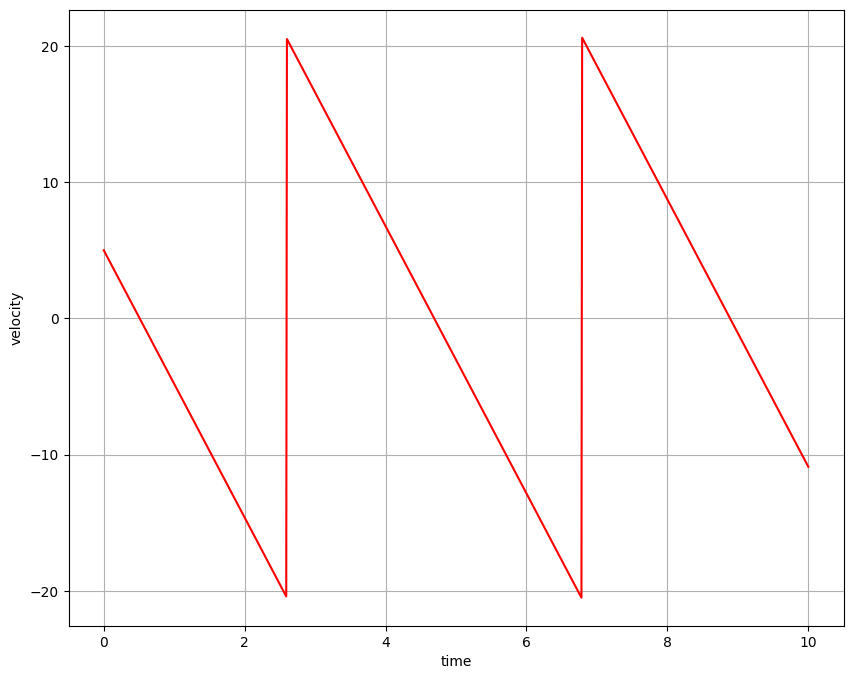

In [58]:
plt.figure(figsize=(10,8))
plt.plot(t,v2,color = 'r')
plt.grid()
plt.xlabel('time')
plt.ylabel('velocity')
plt.show()

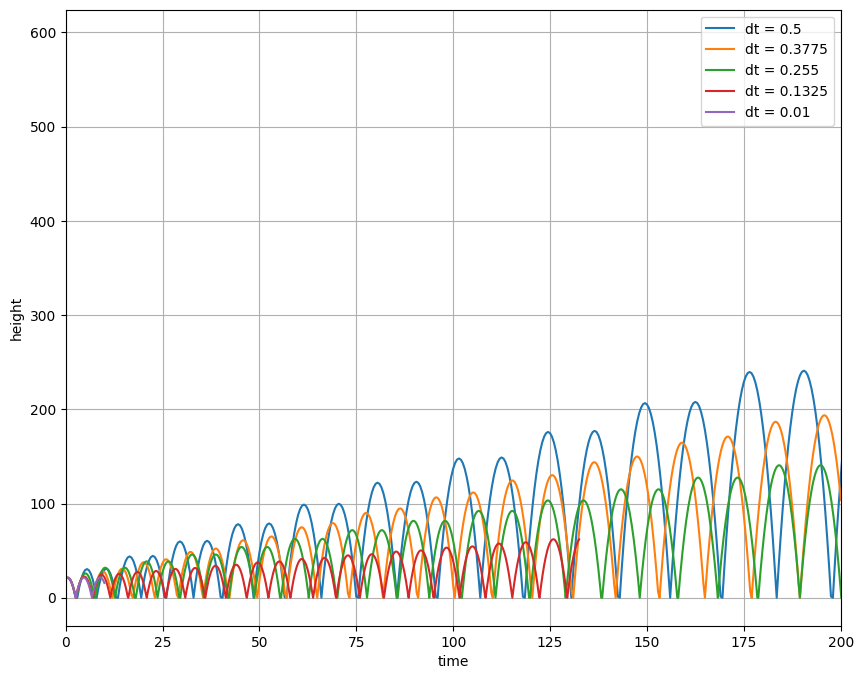

In [59]:

plt.figure(figsize=(10,8))
dt = np.linspace(0.5,0.01,5)
for i in range(dt.size):
    t = np.arange(0,n*dt[i]+dt[i],dt[i])
    h3,v3 = Verlet(k,h0,v0,n,dt[i])
    plt.plot(t,h3,label = f'dt = {dt[i]}')
plt.grid()
plt.xlabel('time')
plt.xlim((0,200))
plt.ylabel('height')
plt.legend()
plt.show()

As we can clearly see the result varies with timestep

## 8

In [60]:
lx = 1
ly = 1
nx = 3
ny = 3
k =3
x = np.linspace(0,lx,nx+2)
y = np.linspace(0,ly,ny+2)

T = np.zeros(shape=(nx+2,ny+2))
Tbottom =  200 
Tright = 100
Ttop = 0
Tleft = 0
T[:,-1] = Ttop
T[-1,:] = Tright
T[:,0] = Tbottom
T[0,:] = Tleft

### a

In [61]:
d = np.ones(k)
I = np.eye(k)   
M = sp.sparse.diags(diagonals=[d,-2*d,d],offsets=[1,0,-1],shape=(k,k))
M = M.toarray()
M

array([[-2.,  1.,  0.],
       [ 1., -2.,  1.],
       [ 0.,  1., -2.]])

In [62]:
S = np.kron(M,I) + np.kron(I,M)
S

array([[-4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -4.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1., -4.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1., -4.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0., -4.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1., -4.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., -4.]])

In [63]:
bver = np.zeros(k**2)
bhor = np.zeros(k**2)
for i in range(k):
    bver[i] = T[0,i+1]
    bver[k**2 - 1-i] = T[-1,k-i]
    bhor[i*k] = T[i+1,0]
    bhor[(i+1)*k - 1] = T[i+1,-1]
bver
bhor

array([200.,   0.,   0., 200.,   0.,   0., 200.,   0.,   0.])

In [64]:
b = -bhor - bver
b

array([-200.,   -0.,   -0., -200.,   -0.,   -0., -300., -100., -100.])

In [65]:
print(S)

[[-4.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1. -4.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0. -4.  1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -4.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0. -4.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1. -4.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1. -4.]]


In [66]:
print(b)

[-200.   -0.   -0. -200.   -0.   -0. -300. -100. -100.]


### b

In [67]:
def GaussSeidel(A,b,e = 1e-6,maxiter =1000):
    n = A.shape[0]
    x = np.ones_like(b,dtype=np.float64)
    it = 0
    tol = np.linalg.norm(b-np.dot(A,x),ord=2)
    while(tol>e and it<maxiter):
        for i in range(n):
            sigma = 0
            for j in range(n):
                if i!=j:
                    sigma+= A[i,j]*x[j]
            x[i] = (b[i] - sigma)/A[i][i]
        tol = np.linalg.norm(b-np.dot(A,x),ord=2)
        it+=1
    if it==maxiter:
        raise Exception("Could not converge to a solution")
    return x

T_gs = GaussSeidel(S,b)
T_gs

array([ 92.85714263,  47.32142834,  21.42857131, 124.10714263,
        74.99999977,  38.39285703, 128.57142846,  90.17857131,
        57.14285709])

In [68]:
lu,piv = sp.linalg.lu_factor(S)
T_lu = sp.linalg.lu_solve((lu,piv),b)
T_lu

array([ 92.85714286,  47.32142857,  21.42857143, 124.10714286,
        75.        ,  38.39285714, 128.57142857,  90.17857143,
        57.14285714])

## 9

$$ \frac{\partial T}{\partial t} = {k}\frac{\partial^2 T}{\partial t^2} $$

### a

**Explicit Scheme**

$$ U_{i,j+1} = U_{i,j}+F(U_{i+1,j} + U_{i-1,j} - 2U_{i,j}) $$

$$ where \hspace{0.25cm} F = \frac{\Delta t k}{dx^2} $$

In [69]:
l = 1 
k = 1

#for t
dt = 0.001
nt = 100000
t = np.linspace(0,nt*dt,nt+1)
#for dx = 0.1
dx1 = 0.1
nx1 = 10
x1 = np.linspace(0,nx1*dx1,nx1+1)
F1 = (dt*k)/dx1**2
#for dx = 0.01
dx2 = 0.01
nx2 = 100
x2 = np.linspace(0,nx2*dx2,nx2+1)
F2 = (dt*k)/dx2**2

In [70]:
print(f'Fourier Number for dx = {dx1} is {F1}')
print(f'Fourier Number for dx = {dx2} is {F2}')

Fourier Number for dx = 0.1 is 0.09999999999999998
Fourier Number for dx = 0.01 is 10.0


We know that for the solution to be stable the Fourier number should be less than 0.5. As we can see that F2 is greater 0.5. Hence it is unstable. F1 is less than 0.5 so our solution for dx = 0.1 is stable.

Accuracy for this scheme depends on `dx^2`. For case 2 since our solution itself is unstable there is no point in looking at the accuracy of it. For F1 our accuracy is of the order :
$$ accuracy = O(0.1^2) = O(0.01)$$

## 10

### i

In [71]:
Lx = 1.0
Ly = 1.0
nx =50
ny =50
x = np.linspace(0,Lx,num=nx+1)
y = np.linspace(0,Ly,num=ny+1)

dx= Lx/nx
dy = Ly/ny
nt = 1000


dt = 0.001
t = np.linspace(0.0,nt*dt,nt+1)

D = 0.1
F1 = D*dt/dx**2
F2 = D*dt/dy**2

C = np.zeros(shape=(nx+1,ny+1,nt+1))
x0,y0 = 0,0
R =0.5
C0 = 3

for i in range(nx+1):
    for j in range(ny+1):
        if (x[i]-x0)**2 + (y[i]-y[0])**2 <= R**2:
            C[i,j,0] = 1
        else:
            C[i,j,0] = 0

C[0,:,:] = C[-1,:,:] = C[:,0,:] = C[:,-1,:] = C0

In [72]:
for k in tqdm(range(1,nt+1)):
    for i in range(1,nx):
        for j in range(1,ny):
            C[i,j,k] = C[i,j,k-1] + F1*(C[i+1,j,k-1] - 2*C[i,j,k-1] + C[i-1,j,k-1])+ F2*(C[i,j+1,k-1] - 2*C[i,j,k-1] + C[i,j-1,k-1])


100%|██████████| 1000/1000 [00:06<00:00, 145.28it/s]


In [73]:
C[:,:,-1]

array([[3.        , 3.        , 3.        , ..., 3.        , 3.        ,
        3.        ],
       [3.        , 2.9976181 , 2.99524557, ..., 2.99524557, 2.9976181 ,
        3.        ],
       [3.        , 2.99524514, 2.99050919, ..., 2.99050919, 2.99524514,
        3.        ],
       ...,
       [3.        , 2.99510165, 2.99022275, ..., 2.99022275, 2.99510165,
        3.        ],
       [3.        , 2.99754578, 2.99510123, ..., 2.99510123, 2.99754578,
        3.        ],
       [3.        , 3.        , 3.        , ..., 3.        , 3.        ,
        3.        ]])

From the matrix its clear that the Concentration is becoming uniform throughout the Domain

In [74]:
from matplotlib.animation import FuncAnimation

In [76]:
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot()

# im = ax.imshow(C[:,:,0], cmap='jet', origin='lower', 
#                extent=[x.min(),x.max(),y.min(),y.max()],
#                vmax=C.max(), vmin=C.min())
# fig.colorbar(im, ax=ax, label='Concentration')

# def update_plot(frame):
#     ax.clear()
#     im = ax.imshow(C[:,:,frame], cmap='jet', origin='lower',
#                   extent=[x.min(),x.max(),y.min(),y.max()],
#                   vmax=C.max(), vmin=C.min())
#     ax.set_title(f'Concentration at t = {frame}')
#     return [im]

# anim = FuncAnimation(
#     fig=fig,
#     func=update_plot,
#     frames=range(0, nt+1, 5),
#     interval=100,
#     blit=True
# )

# anim.save("10i.mp4")
# plt.show()

### ii

In [79]:
Lx = 1.0
Ly = 1.0
nx =50
ny =50
x = np.linspace(0,Lx,num=nx+1)
y = np.linspace(0,Ly,num=ny+1)
X,Y = np.meshgrid(x,y,indexing='ij')

dx= Lx/nx
dy = Ly/ny
nt = 1000


dt = 0.001
t = np.linspace(0.0,nt*dt,nt+1)

D = 0.05
F1 = D*dt/dx**2
F2 = D*dt/dy**2
T1 = D*dt/dx
T2 = D*dt/dy

C = np.zeros(shape=(nx+1,ny+1,nt+1))
x0,y0 = 0.5,0.5
R =1/4.0
C0 = 0

X,Y = np.meshgrid(x,y,indexing='ij')
A = (X-x0)**2+(Y-y0)**2<=R**2
for i in range(nx+1):
    for j in range(ny+1):
        if A[i,j]:
            C[i,j,0] = 1
        else:
            C[i,j,0] = 0



C[0,:,:] = C[-1,:,:] = C[:,0,:] = C[:,-1,:] = C0
# print(x0,T2)


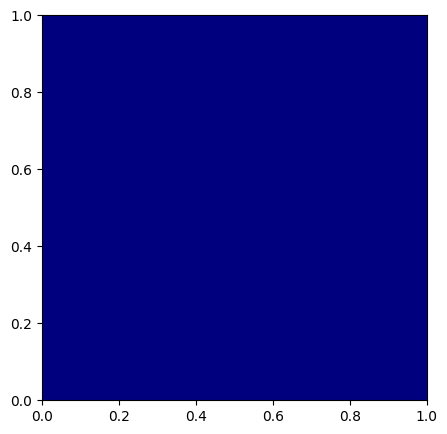

In [78]:
fig_anim, ax_anim = plt.subplots(figsize=(6,5))

vmin, vmax = C.min(), C.max()
im = ax_anim.imshow(C[:, :, -1], cmap='jet', origin='lower',
                    extent=[x.min(), x.max(), y.min(), y.max()],
                    vmin=vmin, vmax=vmax, animated=True)

In [80]:
for k in tqdm(range(1,nt+1)):
    for i in range(1,nx):
        for j in range(1,ny):
            C[i,j,k] = C[i,j,k-1] + \
                ((x[i] - x0)**2 + (y[j]-y0)**2)*F1*(C[i+1,j,k-1] - 2*C[i,j,k-1] + C[i-1,j,k-1])+ \
                ((x[i] - x0)**2 + (y[j]-y0)**2)*F2*(C[i,j+1,k-1] - 2*C[i,j,k-1] + C[i,j-1,k-1])+\
                T1*(x[i] - x0)*(C[i+1,j,k-1] - C[i-1,j,k-1]) +\
                T2*(y[j] - y0)*(C[i,j+1,k-1] - C[i,j-1,k-1])



100%|██████████| 1000/1000 [00:16<00:00, 61.71it/s]


In [ ]:
np.min(C)

In [ ]:
fig= plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

im = ax.imshow(C[:,:,0],cmap='jet',origin='lower',extent=[x.min(),x.max(),y.min(),y.max()],vmax=C.max(),vmin=C.min())
fig.colorbar(im,ax=ax,label ='Concentration')

def update_plot(frame):
    ax.clear()
    # cont = ax.contourf(X,Y,C[:,:,frame],cmap = 'plasma',levels = 200)
    im = ax.imshow(C[:,:,frame],cmap='jet',origin='lower',extent=[x.min(),x.max(),y.min(),y.max()],vmax=C.max(),vmin=C.min())
    ax.set_title(f'Concentration at t =  {frame}')
    return im,

anim = FuncAnimation(
    fig=fig,
    func=update_plot,
    frames= range(0, nt+1, 5),
    interval=100,
    blit=False
)
anim.save("10ii.mp4")
from IPython.display import HTML
plt.close(fig)
HTML(anim.to_jshtml())
# plt.show()